# ¿Qué vende un coche?

Eres un analista en Crankshaft List. Cientos de anuncios gratuitos de vehículos se publican en tu sitio web cada día. Necesitas estudiar los datos recopilados durante los últimos años y determinar qué factores influyen en el precio de un vehículo.

## Inicialización

Cargamos las librerias a utilizar

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

### Cargar datos

Cargamos los datos del proyecto

In [2]:
# Carga el archivo de datos en un DataFrame
try:
    df = pd.read_csv('/datasets/vehicles_us.csv')
except:
    df = pd.read_csv('/content/vehicles_us.csv')

### Explorar datos iniciales

El dataset contiene los siguientes campos:
- `price` - valor del vehiculo.
- `model_year` - año de salida del modelo.
- `model` - modelo del vehiculo.
- `condition` - estado del vehiculo.
- `cylinders` - cantidad de cilindros del vehiculo.
- `fuel` — gasolina, diesel, etc.
- `odometer` — el millaje del vehículo cuando el anuncio fue publicado
- `transmission` - transmisión del vehiculo.
- `paint_color` - color de pintura del vehiculo.
- `is_4wd` — si el vehículo tiene tracción a las 4 ruedas (tipo Booleano).
- `date_posted` — la fecha en la que el anuncio fue publicado.
- `days_listed` — desde la publicación hasta que se elimina.



In [3]:
# imprime la información general/resumida sobre el DataFrame
df.info()
display(df.describe(include= 'all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
count,51525.000000,47906.000000,51525,51525,46265.000000,51525,43633.000000,51525,51525,42258,25572.0,51525,51525.00000
unique,NaN,NaN,100,6,NaN,5,NaN,3,13,12,NaN,354,NaN
top,NaN,NaN,ford f-150,excellent,NaN,gas,NaN,automatic,SUV,white,NaN,2019-03-17,NaN
freq,NaN,NaN,2796,24773,NaN,47288,NaN,46902,12405,10029,NaN,186,NaN
mean,12132.464920,2009.750470,NaN,NaN,6.125235,NaN,115553.461738,NaN,NaN,NaN,1.0,NaN,39.55476
std,10040.803015,6.282065,NaN,NaN,1.660360,NaN,65094.611341,NaN,NaN,NaN,0.0,NaN,28.20427
min,1.000000,1908.000000,NaN,NaN,3.000000,NaN,0.000000,NaN,NaN,NaN,1.0,NaN,0.00000
25%,5000.000000,2006.000000,NaN,NaN,4.000000,NaN,70000.000000,NaN,NaN,NaN,1.0,NaN,19.00000
50%,9000.000000,2011.000000,NaN,NaN,6.000000,NaN,113000.000000,NaN,NaN,NaN,1.0,NaN,33.00000
75%,16839.000000,2014.000000,NaN,NaN,8.000000,NaN,155000.000000,NaN,NaN,NaN,1.0,NaN,53.00000


In [4]:
# imprimir una muestra de datos
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


A primera vista podemos ver ciertas anomalias:
* El valor minimo para `price` es de `1`.
* `model_year` y `cylinders` se encuentran como número de coma flotante en vez de enteros.
* Tenemos valores ausentes en `model_year`, `cylinders`, `odometer`, `paint_color` y `is_4wd`. ¿Habrán mas columnas con valores ausentes que no se aprecien en la muestra?

In [5]:
#Valores ausentes del dataframe
df.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [6]:
# porcentaje de valores ausentes del dataframe
df[['model_year','cylinders','odometer','paint_color','is_4wd']].isna().sum()/len(df)

model_year     0.070238
cylinders      0.102086
odometer       0.153168
paint_color    0.179854
is_4wd         0.503697
dtype: float64

Tenemos una cantidad considerable de valores ausentes en `is_4wd`, más de la mitad de sus datos.

In [7]:
# correlacion inicial de los datos
df.corr()

,price,model_year,cylinders,odometer,is_4wd,days_listed
price,1.000000,0.428656,0.296627,-0.420299,NaN,-0.000682
model_year,0.428656,1.000000,-0.148040,-0.473948,NaN,-0.005703
cylinders,0.296627,-0.148040,1.000000,0.090160,NaN,0.005517
odometer,-0.420299,-0.473948,0.090160,1.000000,NaN,0.003804
is_4wd,NaN,NaN,NaN,NaN,NaN,NaN
days_listed,-0.000682,-0.005703,0.005517,0.003804,NaN,1.000000


### Conclusiones y siguientes pasos

Hemos comprobado la información general de `vehicles_us`.

* Al comprobar los datos, descubrimos que no hay una columna como car_id que identifique de forma exclusiva a un coche. Por ello, no hay suficiente información para concluir que las filas duplicadas pertenecen al mismo coche/cliente o no.

* El rango de `price` va de 1 a 375000. Un precio inferior a 100 parece muy extraño a pesar de no tener claro a que moneda nos referimos. Comprobaremos en detalle si hay alguna correlación con otras columnas.

* Las columnas `model_year`, `cylinders`, `odometer`, `paint_color` y `is_4wd` tienen valores ausentes. En este momento, no estamos seguros de por qué esas columnas tienen valores ausentes, pero no pareciera ser una parte significativa de los datos, exceptuando el caso de `is_4wd`. Vamos a profundizar en los pasos siguientes.

* Las columnas `is_4wd` , `odometer` y `model_year` son de tipo float y debiesen ser int.

* `date_posted` es de tipo object pero debería ser de tipo date.

Procederemos a tratar los valores ausentes.

## Tratar los valores ausentes.

En este paso, vemos los datos con más detalle para identificar los valores ausentes. Sabemos que `model_year`, `cylinders`, `odometer`, `paint_color` y `is_4wd`, analisemos cada uno de los casos individualmente.

1.- Anteriormente vimos que `is_4wd` tiene un 50% de valores ausentes. Basandonos en la información sabemos que esta columna tiene datos de tipo booleano.

In [8]:
df["is_4wd"].unique()

array([ 1., nan])

Podemos ver que todos los valores de esta columna son `1`'s y valores ausentes, por ello podemos suponer que todos los valores ausentes debiesen ser `0`. Por lo tanto, rellenaremos los valores ausentes con 0.

In [9]:
#Reemplazando valores ausentes en "is_4wd"
df['is_4wd'] = df['is_4wd'].fillna(0)
df['is_4wd'].unique()

array([1., 0.])

2.- La columna `model_year` tiene un 7% de valores ausentes y no tiene correlación clara con otras columnas, evaluaremos si especificamente sus valores ausentes tienen alguna relación con otra columna como tipo, modelo y pintura.

In [10]:
# comprobando si los valores ausentes de 'model_year' tienen dependencia con 'type'
df[df['model_year'].isnull()]['type'].value_counts()

SUV            919
sedan          848
truck          836
pickup         504
coupe          145
wagon          110
mini-van        86
hatchback       73
van             39
convertible     27
other           22
offroad         10
Name: type, dtype: int64

In [11]:
# comprobando si los valores ausentes de 'model_year' tienen dependencia con 'model'
df[df['model_year'].isnull()]['model'].value_counts()

ford f-150                           191
chevrolet silverado 1500             155
ram 1500                             117
chevrolet silverado                   98
honda accord                          80
                                    ... 
kia sorento                           14
hyundai santa fe                      13
acura tl                              12
honda civic lx                        11
mercedes-benz benze sprinter 2500      7
Name: model, Length: 100, dtype: int64

In [12]:
# comprobando si los valores ausentes de 'model_year' tienen dependencia con 'paint_color'
df[df['model_year'].isnull()]['paint_color'].value_counts()

white     705
black     516
silver    433
grey      351
blue      332
red       283
green     118
brown     103
custom     79
orange     24
yellow     16
purple      7
Name: paint_color, dtype: int64

Los valores ausentes no parecen tener relación con otra columna, ante esto procederemos a reemplazar los valores ausentes con la mediana de `model_year` basada en el modelo del vehiculo.

In [13]:
df['model_year'] = df['model_year'].fillna(round(df.groupby('model')['model_year'].transform('median'),0))
df['model_year'].isnull().sum()

0

3.- La columna `paint_color` tiene un 17% de valores ausentes y no tiene correlación clara con otras columnas, evaluaremos si especificamente sus valores ausentes tienen alguna relación con otra columna como tipo, modelo y año del modelo.

In [14]:
# comprobando si los valores ausentes de 'paint_color' tienen dependencia con 'type'
df[df['paint_color'].isnull()]['type'].value_counts()

# comprobando si los valores ausentes de 'paint_color' tienen dependencia con 'model'
df[df['paint_color'].isnull()]['model'].value_counts()

# comprobando si los valores ausentes de 'paint_color' tienen dependencia con 'model_year'
df[df['paint_color'].isnull()]['model_year'].value_counts()

#Comprobamos que no hay correlacion clara de los valores ausentes para 'paint_color', por lo que rellenamos nuestros valores ausentes con una nueva clasificación 'unknown'
df['paint_color']=df['paint_color'].fillna(value = 'unknown')
df['paint_color'].value_counts()

white      10029
unknown     9267
black       7692
silver      6244
grey        5037
blue        4475
red         4421
green       1396
brown       1223
custom      1153
yellow       255
orange       231
purple       102
Name: paint_color, dtype: int64

4.- La columna `odometer` tiene un 15% de valores ausentes y no tiene correlación clara con otras columnas, evaluaremos si especificamente sus valores ausentes tienen alguna relación con otra columna como tipo, modelo, año del modelo y condicion.

In [15]:
# comprobando si los valores ausentes de 'odometer' tienen dependencia con 'type'
df[df['odometer'].isnull()]['type'].value_counts()

# comprobando si los valores ausentes de 'odometer' tienen dependencia con 'model'
df[df['odometer'].isnull()]['model'].value_counts()

# comprobando si los valores ausentes de 'odometer' tienen dependencia con 'model_year'
df[df['odometer'].isnull()]['model_year'].value_counts()

# comprobando si los valores ausentes de 'odometer' tienen dependencia con 'condition'
df[df['odometer'].isnull()]['condition'].value_counts()

#Comprobamos que no hay correlacion clara de los valores ausentes para 'odometer', por lo que rellenamos nuestros valores ausentes con la mediana de 'odometer' basado en 'model' y 'model_year'
df['odometer'] = df['odometer'].fillna(df.groupby(['model_year','condition'])['odometer'].transform('median'))
df[df['odometer'].isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
21421,4500,1974.0,chevrolet corvette,fair,8.0,gas,NaN,automatic,sedan,red,0.0,2018-12-15,18
28009,65000,1960.0,chevrolet corvette,like new,8.0,gas,NaN,manual,coupe,unknown,0.0,2018-11-03,41
31806,1700,1996.0,ford mustang,salvage,6.0,gas,NaN,manual,convertible,white,0.0,2019-03-31,46
33257,4500,1963.0,chevrolet impala,fair,NaN,gas,NaN,automatic,sedan,unknown,0.0,2019-03-17,38
33907,12995,1908.0,cadillac escalade,excellent,8.0,gas,NaN,automatic,SUV,white,0.0,2018-06-24,25
45694,18000,1929.0,ford f-150,good,8.0,gas,NaN,manual,other,silver,0.0,2018-11-18,59
46911,22300,2003.0,chevrolet corvette,new,8.0,gas,NaN,manual,convertible,black,0.0,2018-11-08,23


In [16]:
df['model'][df['odometer'].isnull()].value_counts()

chevrolet corvette    3
ford mustang          1
chevrolet impala      1
cadillac escalade     1
ford f-150            1
Name: model, dtype: int64

Analizamos esta columna con otras columnas para ver si hay un patrón o una relación con otras columnas como tipo, modelo, año del modelo y transmisión. Lo primero que se nos ocurre cuando el odometro está en blanco es probablemente porque los coches son nuevos o demasiado viejos, así que comprobamos esta posibilidad. También comprobamos si algo tiene que ver con el tipo de vehiculo. No pudimos lo intentamos con la columna `paint_color`. Como no hay conexión de los valores ausentes de `odometer` con otras columnas, simplemente los rellenamos con el valor medio de odometro basado en el modelo y el año del vehiculo.

Luego notamos que al aplicar este cambio aún nos quedan 7 filas con datos ausentes, considerando la cantidad de datos para el conjunto completo, decidimos descartar estos datos más adelante.

5.- La columna `cylinders` tiene un 10% de valores ausentes y no tiene correlación clara con otras columnas, evaluaremos si especificamente sus valores ausentes tienen alguna relación con otra columna como tipo, modelo, año del modelo y condición.

In [17]:
# comprobando si los valores ausentes de 'cylinders' tienen dependencia con 'type'
df[df['cylinders'].isnull()]['type'].value_counts()

# comprobando si los valores ausentes de 'cylinders' tienen dependencia con 'model'
df[df['cylinders'].isnull()]['model'].value_counts()

# comprobando si los valores ausentes de 'cylinders' tienen dependencia con 'model_year'
df[df['cylinders'].isnull()]['model_year'].value_counts()

# comprobando si los valores ausentes de 'cylinders' tienen dependencia con 'condition'
df[df['cylinders'].isnull()]['condition'].value_counts()

#Comprobamos que no hay correlacion clara de los valores ausentes para 'cylinders', por lo que rellenamos nuestros valores ausentes con la mediana de 'odometer' basado en 'model'
df['cylinders'] = df['cylinders'].fillna(round(df.groupby('model_year')['cylinders'].transform('median'),0))
df[df['cylinders'].isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
14752,15000,1954.0,ford f-150,excellent,NaN,gas,3565.0,manual,pickup,black,0.0,2019-02-16,13
36582,44900,1949.0,chevrolet suburban,good,NaN,gas,1800.0,automatic,wagon,orange,0.0,2018-08-19,10


Comprobamos que `cylinders` no tiene relacion clara con otras columnas, ante esto reemplazamos los valores ausentes con la mediana en base al modelo. Luego de este proceso nos quedan 2 filas con valores ausentes, por la cantidad de datos se decide descartar estos datos.

In [18]:
#Descartando valores ausentes de 'cylinders' y 'odometer'
df.dropna(inplace = True)

In [19]:
# Confirmando que no quedan valores ausentes
df.isna().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

In [20]:
#Confirmando si existen valores duplicados
df.duplicated().sum()

0

## Corregir los tipos de datos

Ahora que nuestros datos estan completos, podemos corregir el tipo de datos de cada columna.

In [21]:
#Confirmando tipo de datos de las columnas
df.dtypes

price             int64
model_year      float64
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd          float64
date_posted      object
days_listed       int64
dtype: object

In [22]:
#Convertir floats a integers
df['model_year'] = df['model_year'].astype(int)
df['is_4wd'] = df['is_4wd'].astype(int)
df['cylinders'] =df['cylinders'].astype(int)

#Convertir float a date time
df['date_posted'] = pd.to_datetime(df['date_posted'], format = "%Y-%m-%d")

# checking data types after conversion
df.dtypes

price                    int64
model_year               int64
model                   object
condition               object
cylinders                int64
fuel                    object
odometer               float64
transmission            object
type                    object
paint_color             object
is_4wd                   int64
date_posted     datetime64[ns]
days_listed              int64
dtype: object

Inicialmente identificamos que habían varias columnas como `float` que debiesen ser `int` por lo que lo corregimos, al igual que `date_posted` necesitaba ser tranformado a `datetime`. Esto probablemente se debió a algún problema en el proceso de recuperación de datos.

## Enriquecer datos

Para facilitar nuestro analisis vamos a añadir las siguientes columnas:
* Día de la semana, mes y año en que se colocó el anuncio.
* La años del vehículo cuando se publicó el anuncio.
* El millaje promedio anual del vehículo.

In [23]:
# Calculando el día de la semana en que se colocó el anuncio
df['week_day'] = df['date_posted'].dt.weekday

# Calculando el mes en que se colocó el anuncio
df['month'] = df['date_posted'].dt.month

# Calculando el dia en que se colocó el anuncio
df['year'] = df['date_posted'].dt.year

# Calculando años del vehiculo
df['vehicle_age'] = df['year'] - df['model_year']

# Calculando millaje promedio del vehiculo
df['avg_mileage'] = (df['odometer']/df['vehicle_age']).where (df['vehicle_age']!=0)


También reemplazaremos los valores de la columna `condition` por una escala del 0 al 5 para poder manipularla con más facilidad.

In [24]:
# Reemplazar los valores de condición con una escala del 0 al 5
def conditions(num):
    condition = num['condition']
    if condition == 'new':
        return 5
    elif condition == 'like new':
        return 4
    elif condition == 'excellent':
        return 3
    elif condition == 'good':
        return 2
    elif condition == 'fair':
        return 1
    return 0

df['condition']= df.apply(conditions, axis = 1)
df['condition'].value_counts()

3    24771
2    20143
4     4741
1     1605
5      142
0      114
Name: condition, dtype: int64

## Comprobar datos limpios

Ya tenemos nuestros datos limpios, comprobemos como quedaron luego del proceso.

In [25]:
#información general/resumida sobre el DataFrame
df.info()
display(df.describe(include= 'all'))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51516 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51516 non-null  int64         
 1   model_year    51516 non-null  int64         
 2   model         51516 non-null  object        
 3   condition     51516 non-null  int64         
 4   cylinders     51516 non-null  int64         
 5   fuel          51516 non-null  object        
 6   odometer      51516 non-null  float64       
 7   transmission  51516 non-null  object        
 8   type          51516 non-null  object        
 9   paint_color   51516 non-null  object        
 10  is_4wd        51516 non-null  int64         
 11  date_posted   51516 non-null  datetime64[ns]
 12  days_listed   51516 non-null  int64         
 13  week_day      51516 non-null  int64         
 14  month         51516 non-null  int64         
 15  year          51516 non-null  int64 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  This is separate from the ipykernel package so we can avoid doing imports until


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,week_day,month,year,vehicle_age,avg_mileage
count,51516.000000,51516.000000,51516,51516.000000,51516.000000,51516,51516.000000,51516,51516,51516,51516.000000,51516,51516.000000,51516.000000,51516.000000,51516.000000,51516.000000,49364.000000
unique,NaN,NaN,100,NaN,NaN,5,NaN,3,13,13,NaN,354,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,ford f-150,NaN,NaN,gas,NaN,automatic,SUV,white,NaN,2019-03-17 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,2794,NaN,NaN,47279,NaN,46898,12404,10027,NaN,185,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-04-19 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,12130.917773,2009.802333,NaN,2.637588,6.119225,NaN,115242.125951,NaN,NaN,NaN,0.496389,NaN,39.556371,3.005028,6.628348,2018.307458,8.505125,17530.780691
std,10037.580113,6.052169,NaN,0.712226,1.577711,NaN,62203.823537,NaN,NaN,NaN,0.499992,NaN,28.205717,1.997658,3.474057,0.461445,6.065941,11996.037956
min,1.000000,1908.000000,NaN,0.000000,3.000000,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,1.000000,2018.000000,0.000000,0.000000
25%,5000.000000,2007.000000,NaN,2.000000,4.000000,NaN,73179.000000,NaN,NaN,NaN,0.000000,NaN,19.000000,1.000000,3.000000,2018.000000,4.000000,10899.541667


In [26]:
# imprimir una muestra de datos
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,week_day,month,year,vehicle_age,avg_mileage
0,9400,2011,bmw x5,2,6,gas,145000.0,automatic,SUV,unknown,1,2018-06-23,19,5,6,2018,7,20714.285714
1,25500,2011,ford f-150,2,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,4,10,2018,7,12672.142857
2,5500,2013,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,3,2,2019,6,18333.333333
3,1500,2003,ford f-150,1,8,gas,193850.0,automatic,pickup,unknown,0,2019-03-22,9,4,3,2019,16,12115.625000
4,14900,2017,chrysler 200,3,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,1,4,2019,2,40451.500000
5,14990,2014,chrysler 300,3,6,gas,57954.0,automatic,sedan,black,1,2018-06-20,15,2,6,2018,4,14488.500000
6,12990,2015,toyota camry,3,4,gas,79212.0,automatic,sedan,white,0,2018-12-27,73,3,12,2018,3,26404.000000
7,15990,2013,honda pilot,3,6,gas,109473.0,automatic,SUV,black,1,2019-01-07,68,0,1,2019,6,18245.500000
8,11500,2012,kia sorento,3,4,gas,104174.0,automatic,SUV,unknown,1,2018-07-16,19,0,7,2018,6,17362.333333
9,9200,2008,honda pilot,3,6,gas,147191.0,automatic,SUV,blue,1,2019-02-15,17,4,2,2019,11,13381.000000


Ya podemos continuar con el analisis de datos exploratorio.

## Estudiar parámetros principales

Estudiaremos los siguientes parametros:
- Precio
- Los años del vehículo cuando el anuncio se colocó
- Millaje
- Número de cilindros
- Estado

Para ello realizaremos histogramas para cada uno de los parametros.

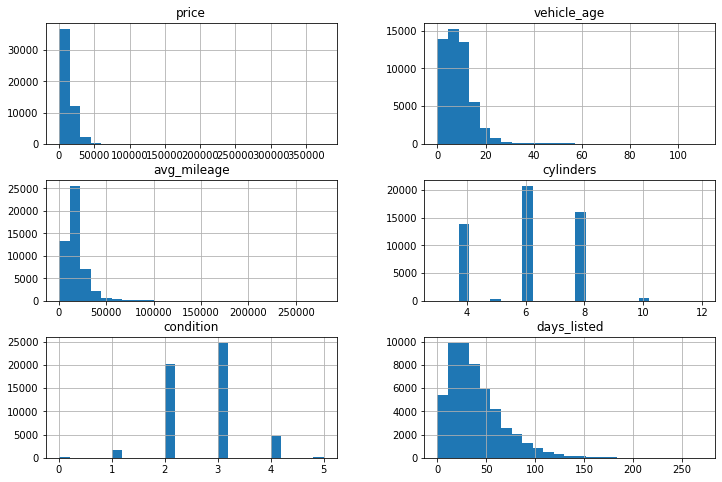

In [27]:
#realizando histogramas para cada parametro

hist_df = df[['price','vehicle_age','avg_mileage','cylinders','condition','days_listed']]
hist_df.hist(figsize =(12,8),bins=25)
plt.show()

## Estudiar y tratar valores atípicos
Podemos ver que `avg_mileage`, `days_listed`, `price` y `vehicle_age` posiblemente tengan valores atipicos que debamos examinar, definamos los limites inferiores y superiores de cada uno para conocer el rango normal de nuestros datos.

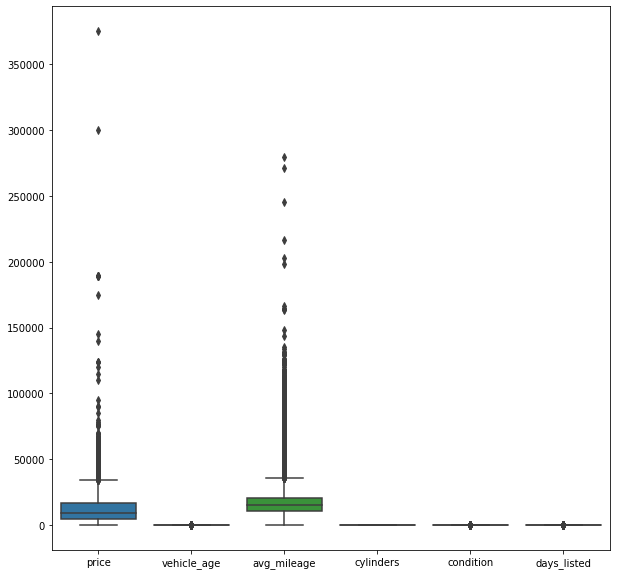

In [28]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=hist_df)
plt.show()

Podemos observar que `price` y `avg_mileage` tienen claros valores atipicos que podrían afectar nuestro analisis.

In [29]:
#Determinamos los valores superiores con Q1
Q1 = hist_df.quantile(0.25)
#Determinamos los valores inferiores con Q3
Q3 = hist_df.quantile(0.75)
#Calculamos el rango intercuartil para nuestros datos
IQR = Q3 - Q1
print(IQR)

price          11811.000000
vehicle_age        8.000000
avg_mileage    10056.390152
cylinders          4.000000
condition          1.000000
days_listed       34.000000
dtype: float64


In [30]:
#Guardamos nuestro dataframe sin valores atipicos
filtered_df = hist_df[(hist_df < (Q3 + 1.5 * IQR))]

Trazamos histogramas iniciales de nuestros datos y detectamos que posiblemente tienen valores atipicos que pudiesen afectar nuestro analisis. Ante esto procedimos a validar la presencia de datos atípicos y efectivamente lo comprobamos, especialmente en `price` y `avg_mileage`.
Decidimos filtrar nuestros datos para tener un dataframe sin valores atipicos calculando IQR, de esta manera lo que no esté en el rango de (Q1 - 1,5 IQR) y (Q3 + 1,5 IQR) es un valor atípico.

## Estudiar parámetros principales sin valores atípicos

Trazemos nuevamente nuestros histogramas ahora sin valores atípicos.

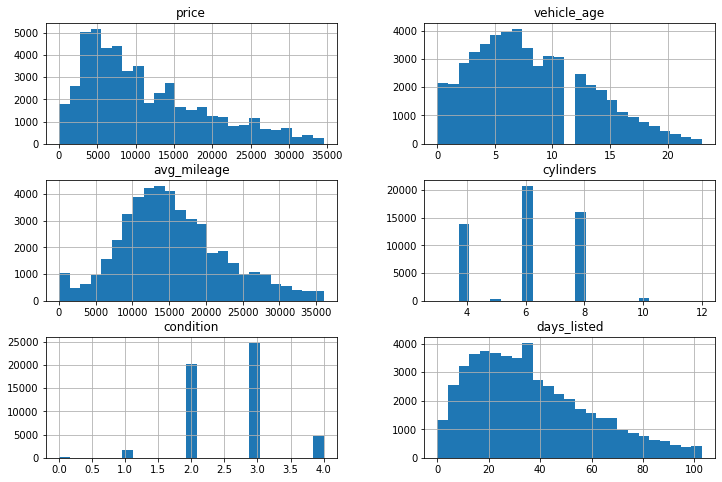

In [31]:
filtered_df.hist(figsize=(12,8),bins= 25)
plt.show()

Basandonos en nuestros nuevos histogramas podemos concluir:
* **Precio**: Nuestro histograma es ahora mucho más legible, podemos ver que la mayoria de vehiculos valen entre `2500` y `7500`. 
* **vehicle_age** : Este histograma también se vuelve mucho más legible, podemos apreciar que cuando el vehiculo se acerca a los `7` años es que más se publican en la web.
* **avg_mileage** : Otro histograma que se ve afectado notoriamente, ahora se puede ver claramente una tendencia a publicar vehiculos entre `10000` y `20000`, cuando anteriormente diríamos que era entre `0` y `50000`.
* **cylinders** : Esta columna no tenía valores atípicos, por lo que no se vio afectada. Observamos que los vehiculos publicados suelen tener `6` y `8` cilindros.
* **condition** : En este caso habían muy pocos casos atípicos por lo que no se vio muy afectada. Se aprecia que cuando el estado del vehiculo es exelente suele venderse con mayor frecuencia.
* **days_listed** : Esta columna se volvió mucho más legible luego del filtrado de valores atipicos. En este caso los datos parecen estar mucho más distribuidos que en el resto.

## Periodo de colocación de los anuncios
Procedamos a analizar el periodo de colocación de los anuncios a profundidad.

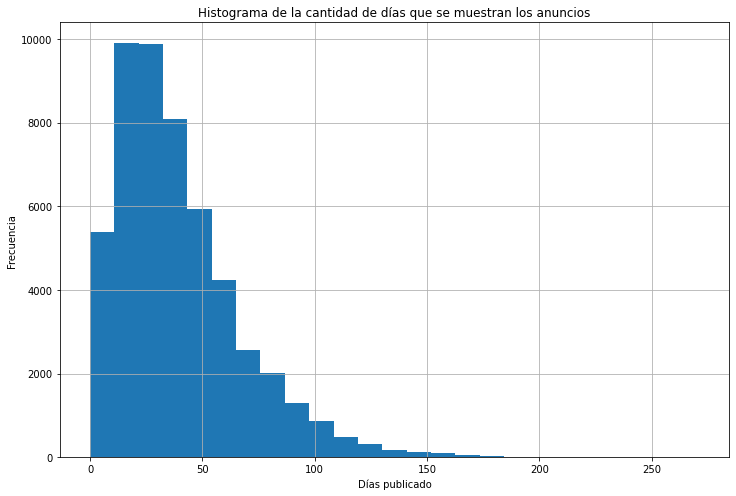

In [32]:
#Trazando el histograma de la cantidad de días en la que se muestran los anuncios
hist_ad= df['days_listed'].hist(figsize=(12,8), bins= 25)
plt.xlabel("Días publicado")
plt.ylabel("Frecuencia")
plt.title("Histograma de la cantidad de días que se muestran los anuncios")
plt.show()

Calculemos la media y la mediana de nuestros datos.

In [33]:
#Calculando la media de días que se muestra un anuncio
round(df['days_listed'].mean(),0)

40.0

In [34]:
#Calculando la mediana de días que se muestra un anuncio
round(df['days_listed'].median(),0)

33.0

In [35]:
# Cantidad de veces que un anuncio duró más de 100 días
df[df['days_listed']>100].shape[0] 

1946

In [36]:
# Cantidad de veces que un anuncio duró menos de un día
df[df['days_listed']<1].shape[0]

54

De esta sección concluimos:
* Normalmente un anuncio se publica por 40 días en promedio.
* Hubo muchas más oportunidades en que un anuncio duro mucho tiempo publicado (1946) que retirado rapidamente (54).

## Precio promedio por cada tipo de vehículo

Analicemos ahora el número de anuncios y el precio promedio para cada tipo de vehículo.

In [37]:
#Analizamos el número de anuncios y el precio medio de cada tipo de vehículo, para ello añadimos el tipo a nuestro dataframe filtrado
filtered_df['type'] = df['type']
#Calculamos el precio promedio por tipo de los anuncios
avgprice_pertype = filtered_df.pivot_table(index='type', values= ['price'], aggfunc =['count', 'mean'])
avgprice_pertype.columns= ['ads_num', 'avg_price']
avgprice_pertype

,ads_num,avg_price
type,,
SUV,12097,10347.667190
bus,24,17135.666667
convertible,421,12514.047506
coupe,2226,13269.010782
hatchback,1046,6841.620459
mini-van,1157,8004.687986
offroad,206,13177.674757
other,251,10477.342629
pickup,6621,14609.683129


Revisemos la dependencia de la cantidad de anuncios contra el tipo de vehiculo.

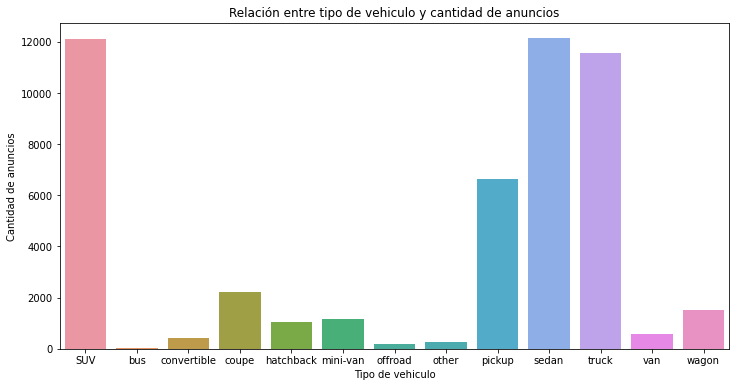

In [38]:
#Graficamos la relacion entre el tipo de vehiculo y la cantidad de anuncios.
fig, ax = plt.subplots()
fig.set_size_inches(12,6)

sns.barplot(x=avgprice_pertype.index, y='ads_num', data=avgprice_pertype, ax=ax, capsize=10)

plt.ylabel('Cantidad de anuncios')
plt.xlabel('Tipo de vehiculo')
plt.title('Relación entre tipo de vehiculo y cantidad de anuncios')
plt.show()

In [39]:
#Seleccionamos los dos valores más altos
avgprice_pertype.sort_values(by='ads_num', ascending=False).index[0:2]

Index(['sedan', 'SUV'], dtype='object', name='type')

Los vehiculos `sedan` y `SUV` son los que más se suelen anunciar en la web.

## Factores de precio

Con estos datos procederemos a  estudiar si el precio depende de la edad, millaje, estado, tipo de transmisión y color.

Para realizarlo  usaremos nuestros tipos más populares detectados en el paso anterior  y estudiaremos la correlacion con cada uno de los factores. Para las variables categóricas (tipo de transmisión y color) trazaremos gráficos de caja y gráficos de dispersión para el resto.


**Variables categoricas**

In [41]:
# añadimos nuestras dos variables categoricas al dataframe
filtered_df['transmission'] = df["transmission"]
filtered_df['paint_color'] = df["paint_color"]
filtered_df

,price,vehicle_age,avg_mileage,cylinders,condition,days_listed,type,transmission,paint_color
0,9400.0,7.0,20714.285714,6,2.0,19.0,SUV,automatic,unknown
1,25500.0,7.0,12672.142857,6,2.0,50.0,pickup,automatic,white
2,5500.0,6.0,18333.333333,4,4.0,79.0,sedan,automatic,red
3,1500.0,16.0,12115.625000,8,1.0,9.0,pickup,automatic,unknown
4,14900.0,2.0,NaN,4,3.0,28.0,sedan,automatic,black
...,...,...,...,...,...,...,...,...,...
51520,9249.0,5.0,17627.200000,6,4.0,37.0,sedan,automatic,black
51521,2700.0,16.0,11343.750000,4,0.0,22.0,sedan,automatic,white
51522,3950.0,9.0,14222.222222,4,3.0,32.0,sedan,automatic,blue
51523,7455.0,5.0,27914.600000,4,2.0,71.0,sedan,automatic,black


Evaluemos si el tipo de transmisión afecta en el precio de un vehiculo:

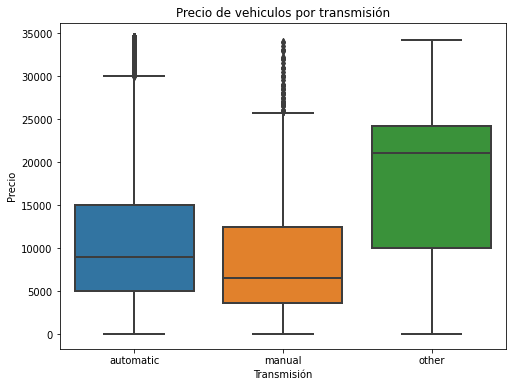

In [44]:
# Usamos boxplot para comprobar la dependencia del precio y transmisión
fig, ax = plt.subplots()
fig.set_size_inches(8,6)
sns.boxplot(x='transmission', y='price', data =filtered_df, linewidth =2, ax=ax)
plt.title('Precio de vehiculos por transmisión')
plt.ylabel('Precio')
plt.xlabel('Transmisión')
plt.show()

In [48]:
#Nos aseguramos que hayan más de 50 anuncios por categoria para que la conclusión sea significativa
filtered_df["transmission"].value_counts()

automatic    46898
manual        2824
other         1794
Name: transmission, dtype: int64

* Podemos concluir que el valor del vehiculo si depende del tipo de transmisión, esto porque la transmisión manual tiene un valor bajo, mientras que la automatica eleva un poco su precio. También podemos ver que "otras" transmisiones suelen tener valores mucho más elevados, probablemente son tecnologías más avanzadas.

Continuemos con la siguiente variable categorica: el color del vehiculo.

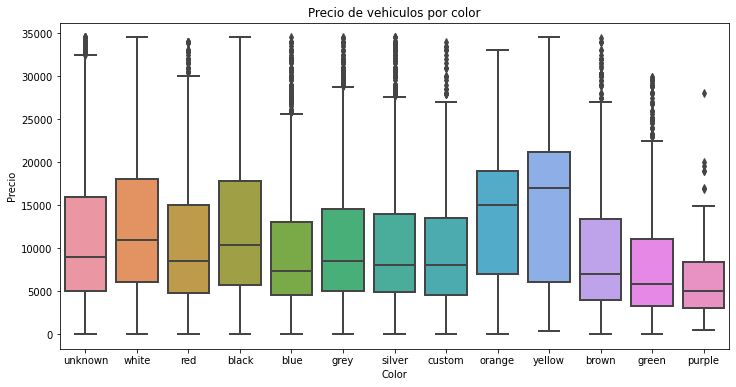

In [46]:
#Usamos boxplot para comprobar la dependencia del precio y color del vehiculo
fig, ax = plt.subplots()
fig.set_size_inches(12,6)

sns.boxplot(x='paint_color', y='price', data =filtered_df, linewidth =2, ax=ax)
plt.title('Precio de vehiculos por color')
plt.ylabel('Precio')
plt.xlabel('Color')
plt.show()

In [47]:
#Nos aseguramos que hayan más de 50 anuncios por categoria para que la conclusión sea significativa
filtered_df["paint_color"].value_counts()

white      10027
unknown     9265
black       7690
silver      6243
grey        5037
blue        4475
red         4420
green       1396
brown       1223
custom      1153
yellow       255
orange       230
purple       102
Name: paint_color, dtype: int64

* Podemos concluir que el precio si se ve afectado por el color, los colores blanco, negro, naranja y amarillos son levemente más altos, mientras que el purpura y verde son los que menos valen.

**Variables numericas**

Para las variables numericas comenzamos filtrando los tipos de vehiculo más venidido (sedan y SUV) para utilizarlo en nuestros graficos.

In [49]:
SUV_data = filtered_df.query('type =="SUV"')
sedan_data = filtered_df.query('type =="sedan"')

Analizamos la relación de la edad del vehiculo y precio.

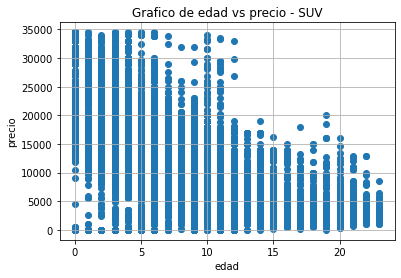

In [50]:
#Realizamos un grafico de dispersión del precio vs la edad del los SUV
plt.scatter(SUV_data['vehicle_age'], SUV_data['price'])
plt.title('Grafico de edad vs precio - SUV')
plt.xlabel('edad')
plt.ylabel('precio')
plt.grid()
plt.show()

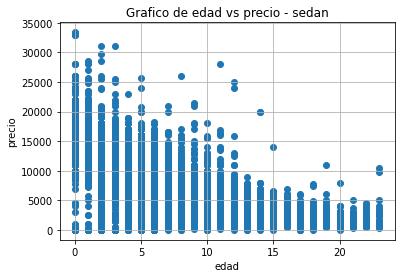

In [51]:
#Realizamos un grafico de dispersión del precio vs la edad del los sedan
plt.scatter(sedan_data['vehicle_age'], sedan_data['price'])
plt.title('Grafico de edad vs precio - sedan')
plt.xlabel('edad')
plt.ylabel('precio')
plt.grid()
plt.show()

Podemos decir que hay una tendencia para ambos modelos de decrementar a medida que avanza la edad del vehiculo.

Analizamos la relación del millaje promedio y precio.

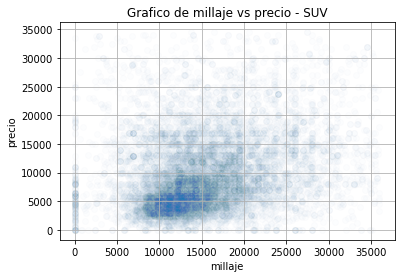

In [61]:
#Realizamos un grafico de dispersión del precio vs millaje del los SUV
plt.scatter(SUV_data['avg_mileage'], SUV_data['price'], alpha=.01)
plt.title('Grafico de millaje vs precio - SUV')
plt.xlabel('millaje')
plt.ylabel('precio')
plt.grid()
plt.show()

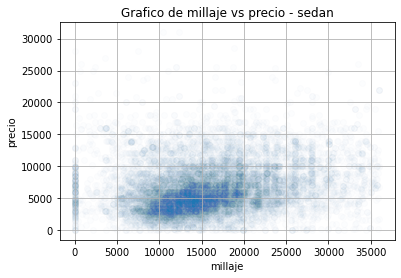

In [62]:
#Realizamos un grafico de dispersión del precio vs millaje del los sedan
plt.scatter(sedan_data['avg_mileage'], sedan_data['price'], alpha=.01)
plt.title('Grafico de millaje vs precio - sedan')
plt.xlabel('millaje')
plt.ylabel('precio')
plt.grid()
plt.show()

Sorprendentemente, se puede observar una leve correlación positiva entre el valor y el millaje promedio de un vehiculo.


Analizamos la relacion del estado del vehiculo vs el precio

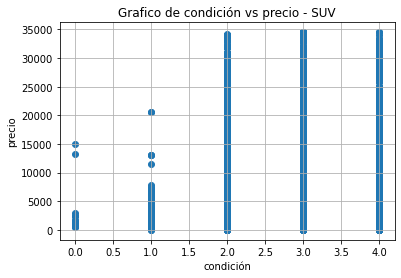

In [54]:
#Realizamos un grafico de dispersión del precio vs la condición de los SUV
plt.scatter(SUV_data['condition'], SUV_data['price'])
plt.title('Grafico de condición vs precio - SUV')
plt.xlabel('condición')
plt.ylabel('precio')
plt.grid()
plt.show()

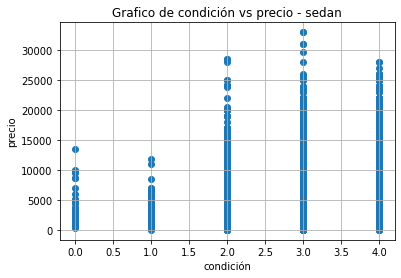

In [55]:
#Realizamos un grafico de dispersión del precio vs la condición de los sedan
plt.scatter(sedan_data['condition'], sedan_data['price'])
plt.title('Grafico de condición vs precio - sedan')
plt.xlabel('condición')
plt.ylabel('precio')
plt.grid()
plt.show()

Podemos ver que mientras mejor la condición del vehiculo, mayor su valor.

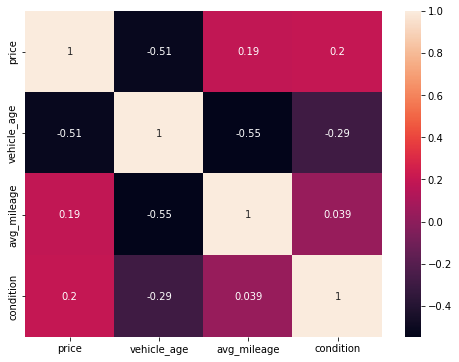

In [59]:
#Visualizamos la correlacion entre las variables cuantitativas en un heatmap
plt.figure(figsize = (8, 6))
sns.heatmap(filtered_df[['price', 'vehicle_age', 'avg_mileage', 'condition']].corr(), annot = True)
plt.show()

Conclusiones:
* El valor de los vehiculos y su edad están correlacionados negativamente, por lo que mientras más edad tenga un vehiculo, menor será su valor.
* El millaje casi no muestra relación con respecto al valor de un vehiculo.
* Los vehiculos en mejores condiciones tienen un mayor valor.

## Conclusión general

El proyecto busca identificar que factores influyen en el precio de un vehículo.
Para ello preprocesamos el conjunto de datos, identificamos los valores que faltaban y las incoherencias en el conjunto de datos e intentamos identificar por qué faltaban. Las posibles razones de los valores que faltan podrían ser muchas. Sin embargo, las comunicamos al interesado para poder evitar posibles discrepancias en el futuro.

De todas maneras, hemos intentado sustituir los valores que faltaban con la mayor precisión posible, comprobando la relación entre el kilometraje de un coche, el estado del coche y el precio de este, y entre otros datos. Cambiamos los tipos de datos de las columnas que tenían tipos incorrectos, y calculamos valores que nos serían útiles como el "día de la semana, el mes y el año en que se publicó el anuncio, la edad del vehículo, cuando se publicaron los anuncios y el kilometraje medio del vehículo al año para poder identificar mejor los anuncios en las ventas de coches.

Elaboramos gráficos del conjunto de datos para visualizar la relación de los precios de los coches con los tipos de coche, los modelos, las transmisiones, los colores, la edad del vehículo y el millaje. Esto era un indicador de la presencia de valores atípicos, que podrían obstaculizar en gran medida el rendimiento de nuestro análisis. Por ello, sólo consideramos los datos inferiores a los límites superiores de los valores atípicos. Descubrimos que los valores atípicos afectan significativamente a la legibilidad de los histogramas.

Pudimos ver que un anuncio suele durar unos 40 días. Unos 54 anuncios duraron menos de un día. El tiempo más largo de un anuncio fue de 1946 días. El sedán y el SUV son los tipos de vehículos con mayor número de anuncios.
El precio del vehículo depende del tipo de transmisión. Las otras transmisiones tienen los precios medios más altos, mientras que las transmisiones manuales tienen los precios medios más bajos.

También hemos comprobado la relación entre el año y el precio de un coche. Obviamente, los coches más antiguos son más baratos, con algunas excepciones de coches antiguos, y los más nuevos son siempre caros. Entre todos ellos, la edad de un vehículo es la que más se correlaciona con el precio.
Otro factor principal que contribuye al precio de un coche es el estado del mismo. Los coches en buen y excelente estado tienen un precio más alto que los coches en buen estado y los salvados. 
